In [1]:
# Data analysis and Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline as IMBPipeline

In [3]:
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve

#### Load the Data

In [4]:
# Load Data
sheet_id="1GQ2wltXJ-veItC2BVoWJx7MmeS2mcljb62dVRrAMYZk"
sheet_name="Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df=pd.read_csv(url)

#### PreProcessing

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.shape

(195, 24)

In [7]:
df.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

#### EDA

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\2249947881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='coolwarm')


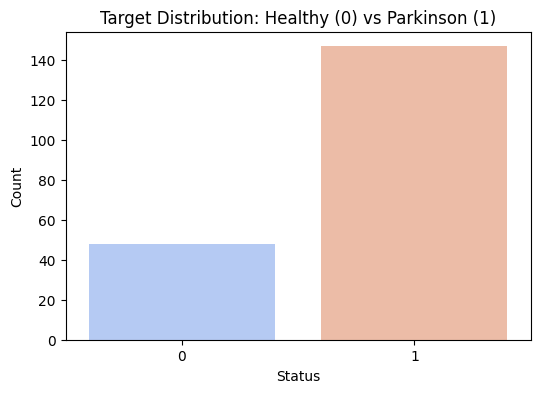

In [76]:
#Check class balance
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df, palette='coolwarm')
plt.title("Target Distribution: Healthy (0) vs Parkinson (1)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

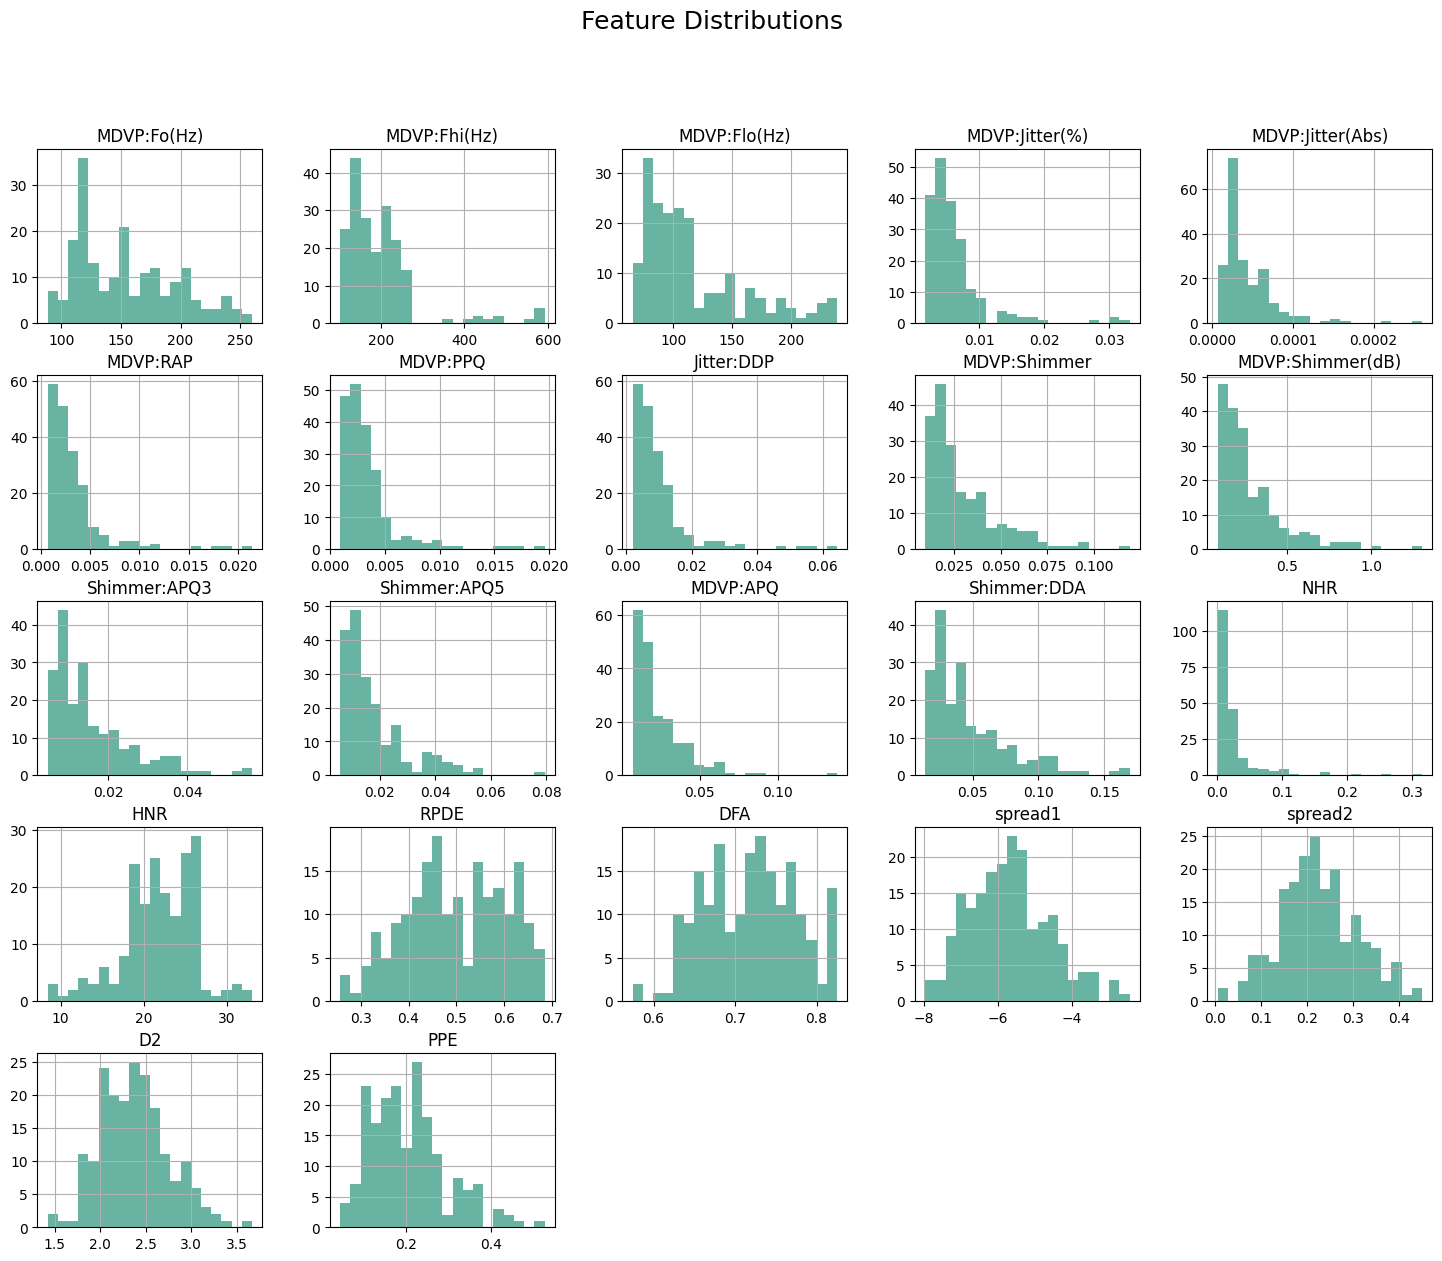

In [77]:
#Feature Distributions
numeric_features = df.select_dtypes(include='number').columns.drop('status')

df[numeric_features].hist(bins=20, figsize=(18, 14), color='#69b3a2')
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


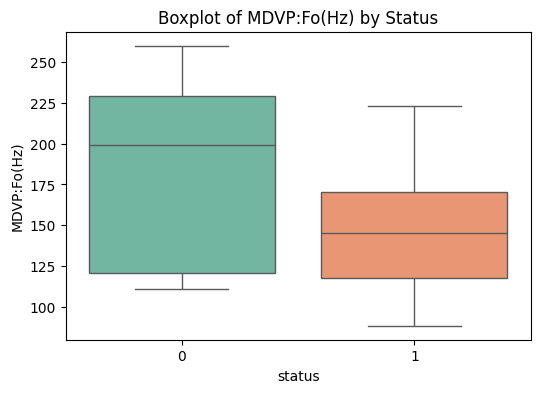

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


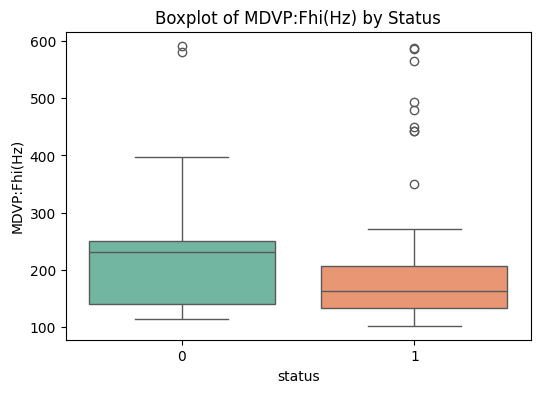

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


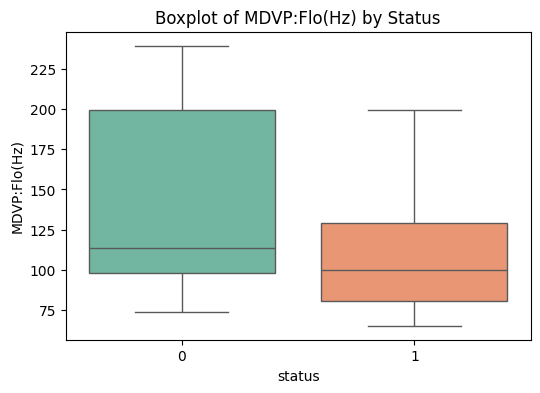

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


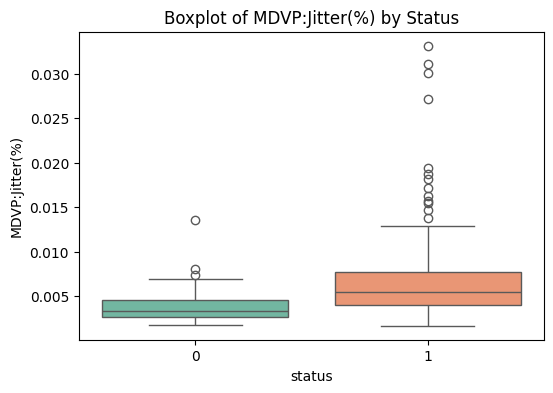

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


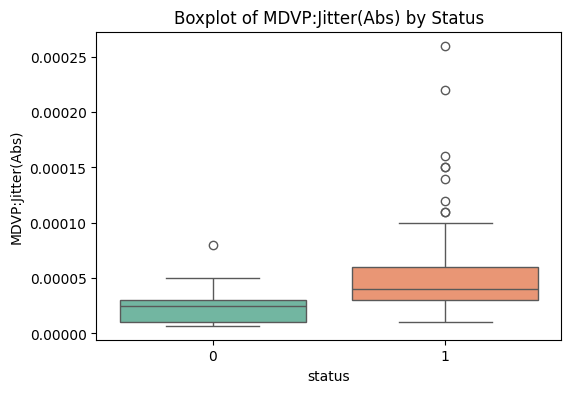

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


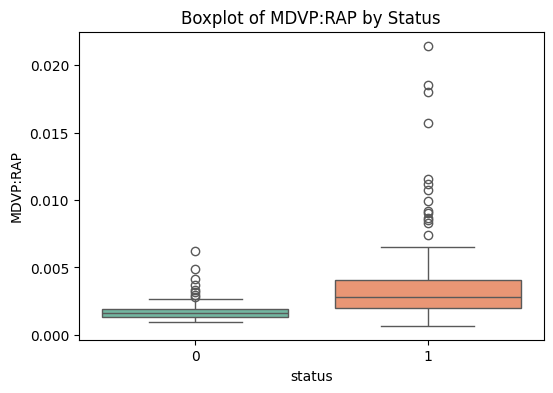

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


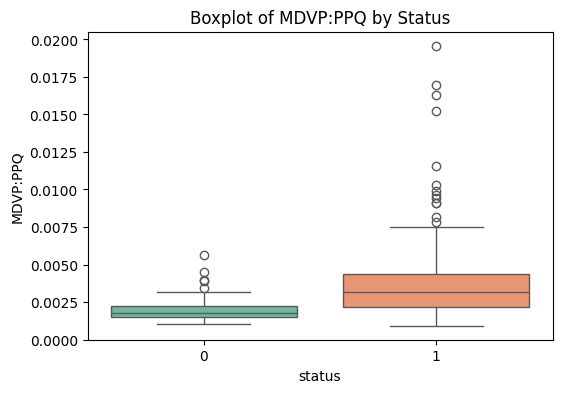

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


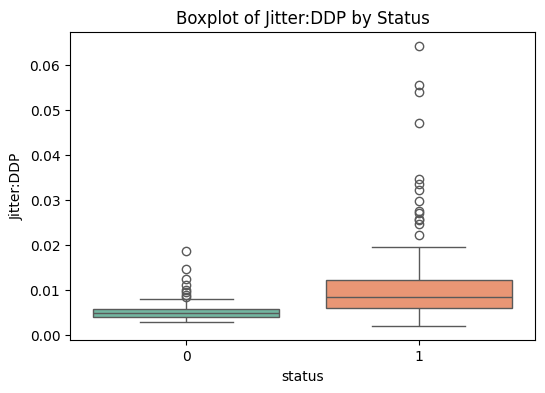

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


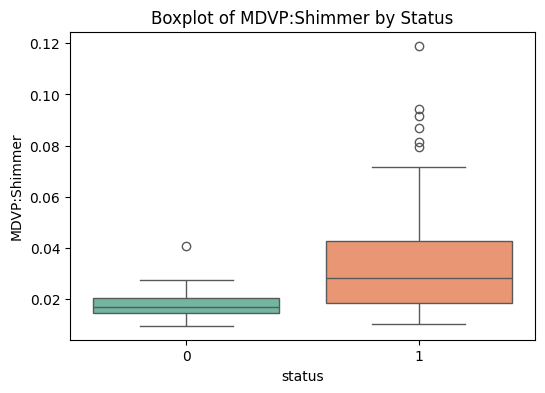

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


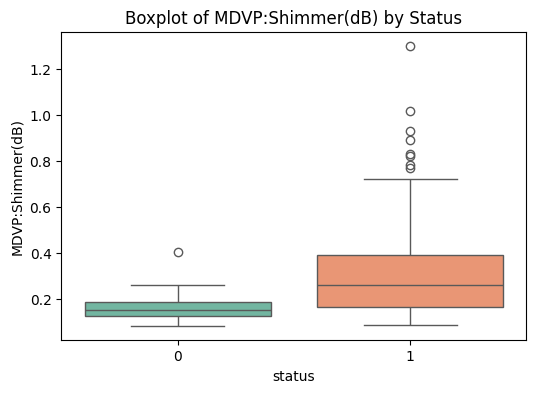

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


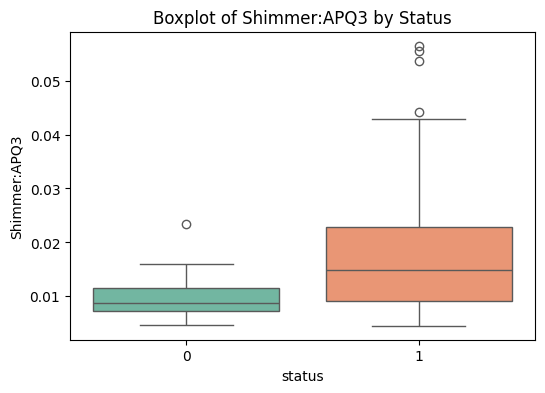

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


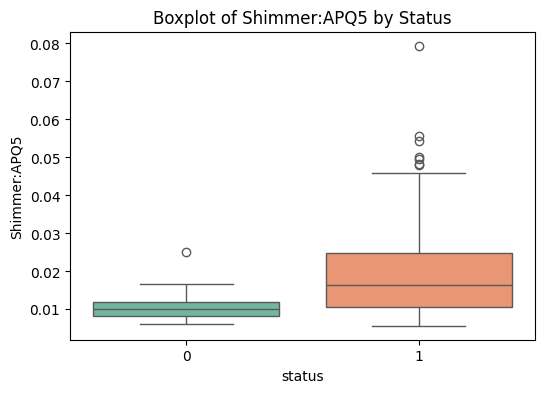

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


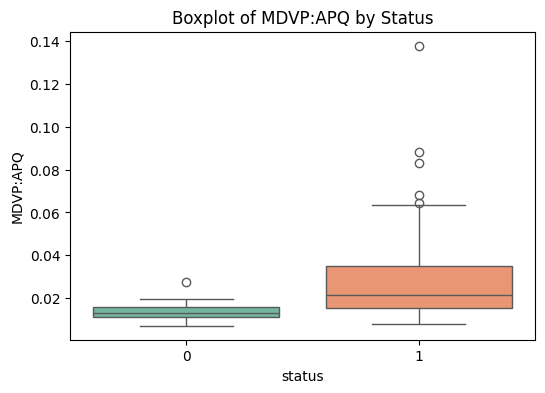

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


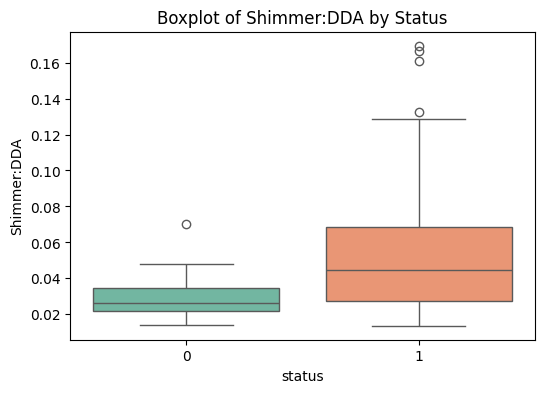

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


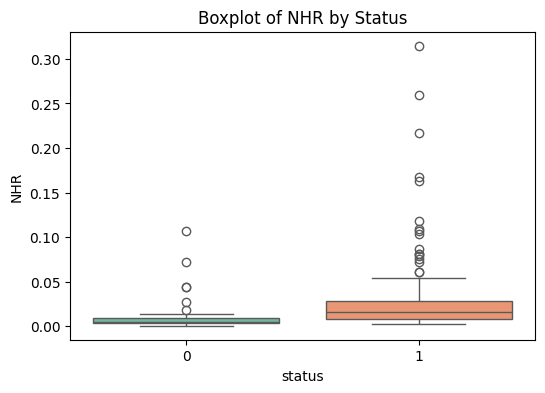

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


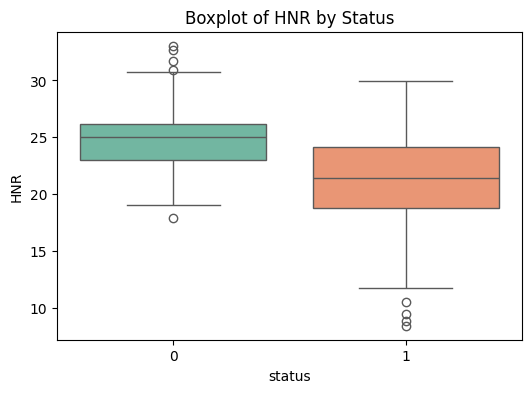

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


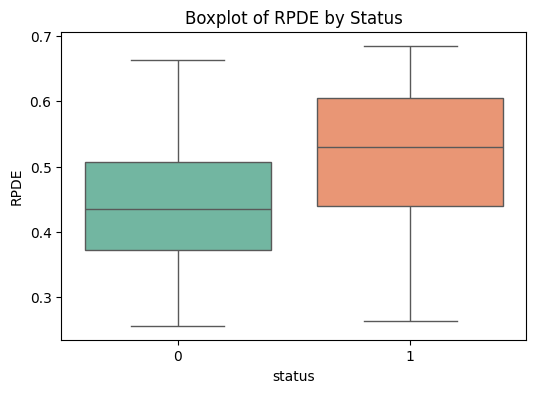

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


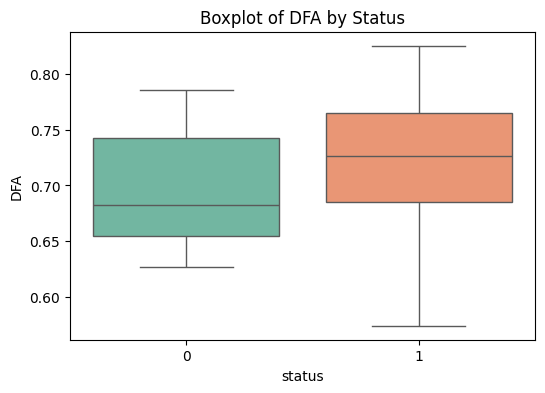

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


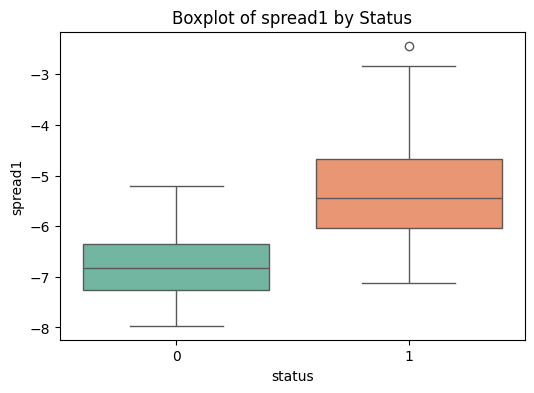

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


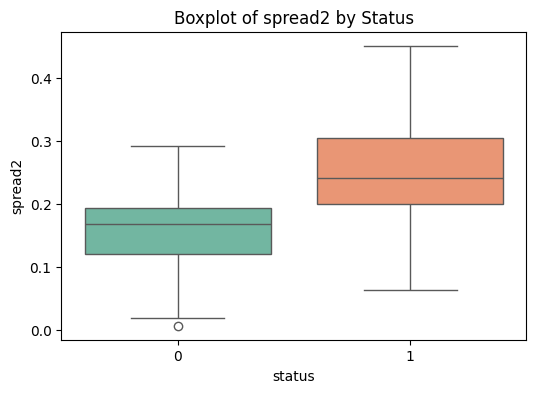

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


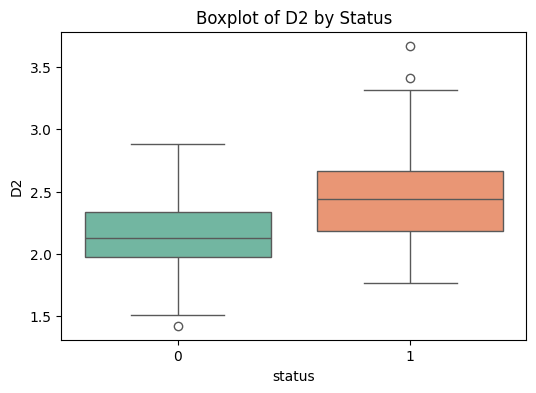

C:\Users\Madhu\AppData\Local\Temp\ipykernel_25028\1611150473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='Set2')


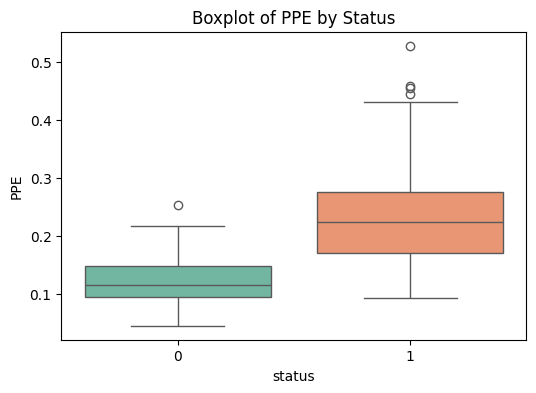

In [78]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='status', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot of {col} by Status")
    plt.show()

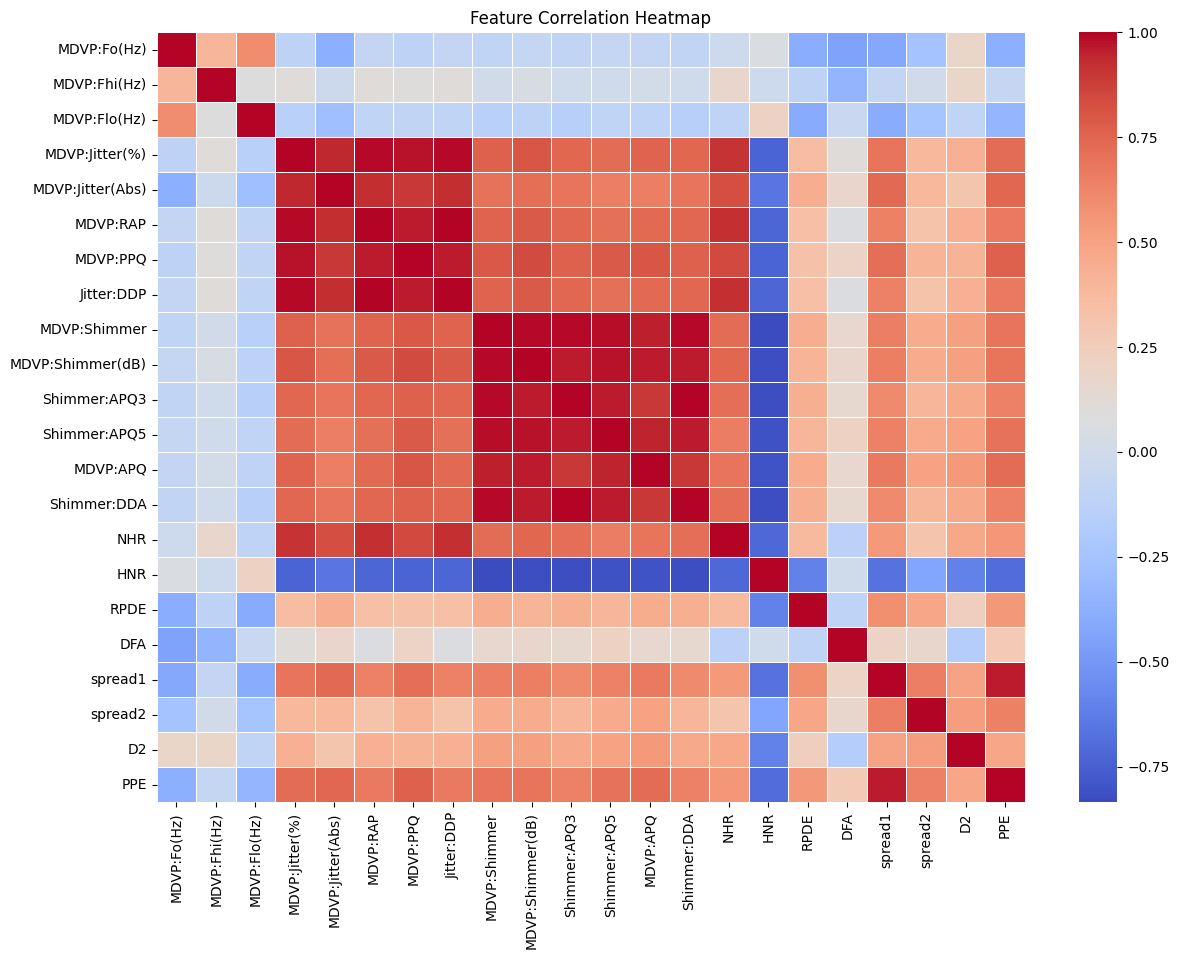

In [79]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
corr = df[numeric_features].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Seperating X and y

In [15]:
df = df.drop('name', axis=1)
X=df.drop('status',axis=1) # Features
y=df['status']             # Target
# 0 - healthy
# 1 - unhealthy

In [16]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

### Feature Selection

In [17]:
from scipy.stats import ttest_ind

for col in X:
    # Class A and B scores
    class_a = df[df['status']==0][col]
    class_b = df[df['status']==1][col]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)
    print(f"Feature: {col}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: ✅ class averages are significantly different.")
    else:
        print("Fail to reject the null hypothesis:❌No significant difference.")
    print("-"*60)

Feature: MDVP:Fo(Hz)
t-statistic: 5.7695
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: MDVP:Fhi(Hz)
t-statistic: 2.3406
p-value: 0.020276
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: MDVP:Flo(Hz)
t-statistic: 5.7108
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: MDVP:Jitter(%)
t-statistic: -4.0240
p-value: 0.000082
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: MDVP:Jitter(Abs)
t-statistic: -5.0002
p-value: 0.000001
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: MDVP:RAP


In [28]:
important_features = [
    'MDVP:Fo(Hz)',
    'MDVP:Jitter(%)',
    'MDVP:Shimmer',
    'RPDE',
    'DFA',
    'PPE',
    'spread1',
    'spread2',
    'HNR'
]

# Keep only the important ones
X_selected = X[important_features]

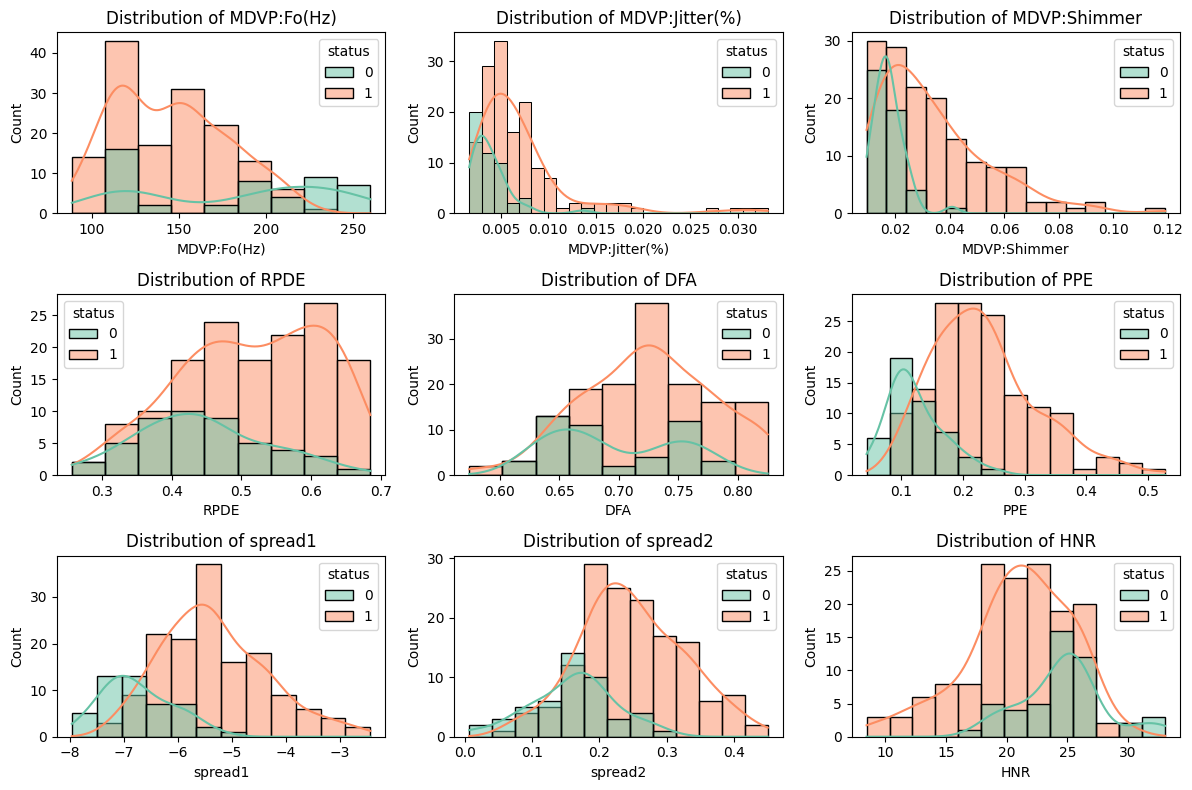

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_selected, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='status', kde=True, palette='Set2')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [85]:
Num_trans=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

In [84]:
Preprcess=ColumnTransformer(transformers=[
        ('Num_continues',Num_trans,X_selected.columns)
])
Preprcess

,transformers,"[('Num_continues', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((156, 9), (39, 9), (156,), (39,))

In [52]:
y_train.value_counts()

status
1    115
0     41
Name: count, dtype: int64

##### Balancing Data

In [136]:
#For Smote ,data should be preprocessed
preprcess_pipeline=Pipeline(steps=[
    ('Preprcess',Preprcess)
])
preprcess_pipeline

,steps,"[('Preprcess', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num_continues', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [137]:
X_train_trans=preprcess_pipeline.fit_transform(X_train)
X_train_trans

array([[-0.80172872,  0.68289579,  0.85220226, ...,  1.35367783,
         0.89854281, -0.12218528],
       [-1.04374224, -0.22573138,  0.5634071 , ...,  0.37366749,
         1.17531845, -0.89858005],
       [-0.3790498 ,  0.17682496,  0.74031304, ...,  0.29714641,
        -0.7771489 , -0.77210659],
       ...,
       [-0.13744368, -0.2928241 ,  0.59465544, ..., -0.18198275,
        -1.65126173, -0.6716469 ],
       [-0.14053505, -0.42125874, -0.78631969, ...,  0.03441697,
         0.19569946,  0.36530857],
       [-0.35427092,  4.5991939 ,  3.23010032, ...,  2.22823269,
         0.55494177, -2.42514431]], shape=(156, 9))

In [138]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train_trans,y_train)
y_train_smote.value_counts()

status
1    115
0    115
Name: count, dtype: int64

## Model Creation

In [135]:
Lg_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',LogisticRegression(class_weight='balanced'))

])

Lg_pipeline.fit(X_train,y_train)

y_train_pred=Lg_pipeline.predict(X_train)
y_test_pred=Lg_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[31 10]
 [17 98]]
Test [[ 4  3]
 [ 1 31]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        41
           1       0.91      0.85      0.88       115

    accuracy                           0.83       156
   macro avg       0.78      0.80      0.79       156
weighted avg       0.84      0.83      0.83       156

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



In [126]:
SVM_pipeline = IMBPipeline(steps=[
    ('Preprocess', Preprcess),                 
    ('Sampling', SMOTE(random_state=42)),      
    ('Model', SVC(kernel='rbf', C=3, gamma='scale', class_weight='balanced')) 
])

# Fit the pipeline
SVM_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = SVM_pipeline.predict(X_train)
y_test_pred = SVM_pipeline.predict(X_test)

# Confusion matrices
print('Confusion Matrix')
print('Train:\n', confusion_matrix(y_train, y_train_pred))
print('Test:\n', confusion_matrix(y_test, y_test_pred))
print('--'*50)

# Evaluation metrics
print('Evaluation on Training Data')
print(classification_report(y_train, y_train_pred))

print('Evaluation on Testing Data')
print(classification_report(y_test, y_test_pred))


Confusion Matrix
Train:
 [[ 41   0]
 [  6 109]]
Test:
 [[ 5  2]
 [ 1 31]]
----------------------------------------------------------------------------------------------------
Evaluation on Training Data
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      0.95      0.97       115

    accuracy                           0.96       156
   macro avg       0.94      0.97      0.95       156
weighted avg       0.97      0.96      0.96       156

Evaluation on Testing Data
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



## Applying PCA

In [58]:
X_train

,MDVP:Fo(Hz),MDVP:Jitter(%),MDVP:Shimmer,RPDE,DFA,PPE,spread1,spread2,HNR
5,120.552,0.00968,0.04701,0.415564,0.825069,0.357775,-4.242867,0.299111,21.378
135,110.453,0.00494,0.04128,0.653427,0.706687,0.228319,-5.333619,0.322044,17.707
122,138.190,0.00704,0.04479,0.538016,0.741480,0.229892,-5.418787,0.160267,18.305
167,260.105,0.00339,0.02030,0.440988,0.628058,0.075587,-7.517934,0.160414,21.083
85,180.978,0.00406,0.03852,0.583574,0.727747,0.200423,-5.657899,0.315903,16.176
...,...,...,...,...,...,...,...,...,...
106,155.078,0.00168,0.01064,0.334171,0.677930,0.106802,-6.981201,0.184550,29.746
14,152.845,0.00294,0.01828,0.474791,0.654027,0.170100,-6.105098,0.203653,24.922
92,148.272,0.00459,0.04190,0.454444,0.734504,0.186489,-5.952058,0.087840,18.780
179,148.143,0.00392,0.01450,0.398499,0.778349,0.192730,-5.711205,0.240875,23.683


In [ ]:
scalar=StandardScaler()
scalar.fit(X_train)
Scaled_X_train=scalar.transform(X_train)
Scaled_X_test=scalar.transform(X_test)

In [114]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(Scaled_X_train)
X_train_pca=pca.transform(Scaled_X_train)
X_test_pca=pca.transform(Scaled_X_test)

In [115]:
pca_scaled_df=pd.DataFrame(X_train_pca,columns=['PC1','PC2'])
pca_scaled_df

,PC1,PC2
0,2.281828,1.783660
1,1.687189,0.216655
2,0.853971,0.006035
3,-2.530932,-2.862539
4,1.019526,-0.651905
...,...,...
151,-2.911642,0.173893
152,-1.253961,-0.440598
153,-0.370354,-0.194954
154,-0.694680,1.170787


In [116]:
pca_scaled_df['Target']=y_train
pca_scaled_df

,PC1,PC2,Target
0,2.281828,1.783660,1.0
1,1.687189,0.216655,1.0
2,0.853971,0.006035,1.0
3,-2.530932,-2.862539,1.0
4,1.019526,-0.651905,1.0
...,...,...,...
151,-2.911642,0.173893,1.0
152,-1.253961,-0.440598,1.0
153,-0.370354,-0.194954,NaN
154,-0.694680,1.170787,1.0


In [119]:
# Logistic Regression

model=LogisticRegression()
model.fit(Scaled_X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [120]:
Y_train_pred=model.predict(Scaled_X_train)
Y_test_pred=model.predict(Scaled_X_test)
print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_train_pred))
print('Test',confusion_matrix(y_test,Y_test_pred))
print('--'*50)
print('Training Result')
print(classification_report(y_train,Y_train_pred))
print('Test Result')
print(classification_report(y_test,Y_test_pred))

Confusion Matrix
Train [[ 26  15]
 [  7 108]]
Test [[ 4  3]
 [ 0 32]]
----------------------------------------------------------------------------------------------------
Training Result
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        41
           1       0.88      0.94      0.91       115

    accuracy                           0.86       156
   macro avg       0.83      0.79      0.81       156
weighted avg       0.85      0.86      0.85       156

Test Result
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



In [146]:
# SVM
SVM_PCA=SVC(kernel='rbf', C=3, gamma='scale')
SVM_PCA.fit(Scaled_X_train,y_train)
Y_train_pred=SVM_PCA.predict(Scaled_X_train)
Y_test_pred=SVM_PCA.predict(Scaled_X_test)
print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_train_pred))
print('Test',confusion_matrix(y_test,Y_test_pred))
print('--'*50)
print('Training Result')
print(classification_report(y_train,Y_train_pred))
print('Test Result')
print(classification_report(y_test,Y_test_pred))

Confusion Matrix
Train [[ 35   6]
 [  0 115]]
Test [[ 5  2]
 [ 0 32]]
----------------------------------------------------------------------------------------------------
Training Result
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.95      1.00      0.97       115

    accuracy                           0.96       156
   macro avg       0.98      0.93      0.95       156
weighted avg       0.96      0.96      0.96       156

Test Result
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [147]:
import pickle
pickle.dump(SVM_PCA,open('C:/DS_Programs/Project4_Disease_prediction/parkinson_model.pkl','wb'))